### Data Acquisition

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv"
df_load = pd.read_csv(url)

### Data Understanding

#### Churn = Pelanggan yang beralih produk / layanan, misalnya dari layanan a ke layanan b
#### UpdatedAt = Periode data diambil
#### customerId = ID Pelanggan
#### gender = jenis kelamin
#### SeniorCitizen = apakah si pelanggan adalah sudah lama menjadi warga negara sana
#### Partner = apakah si pelanggan memiliki partner
#### tenure = berapa bulan si pelanggan sudah berlangganana
#### PhoneServices = apakah si pelanggan memiliki layanan telepon
#### InternetServices = apakah si pelanggan memiliki layanan internet
#### StreamingTV = apakah si pelanggan memiliki layanan stream tv
#### Paperless billing = apakah si pelanggan memiliki gaya pembayaran paperless atau tidak
#### monthlycharges = pembayaran perbulan
#### totalcharges = pembayaran total pelanggan
#### churn = apakah si pelanggan churn atau tidak

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [4]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [5]:
df_load.describe()

,UpdatedAt,customerID,tenure,MonthlyCharges,TotalCharges
count,6950.0,6.950000e+03,6950.000000,6950.000000,6950.000000
mean,202006.0,4.549898e+10,32.423165,64.992201,2286.058750
std,0.0,2.854091e+08,24.581073,30.032040,2265.702553
min,202006.0,4.500026e+10,0.000000,0.000000,19.000000
25%,202006.0,4.525607e+10,9.000000,36.462500,406.975000
50%,202006.0,4.549871e+10,29.000000,70.450000,1400.850000
75%,202006.0,4.574384e+10,55.000000,89.850000,3799.837500
max,202006.0,4.599959e+10,124.000000,169.931250,8889.131250


In [6]:
df_load.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_load.shape

(6950, 13)

In [8]:
drop = ['UpdatedAt','customerID']

df_load.drop(drop,1,inplace=True)

df_load.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


### Exploratory Data Analysis

#### Outlier Detection: Monthly Charges, Tenure, Total Charges

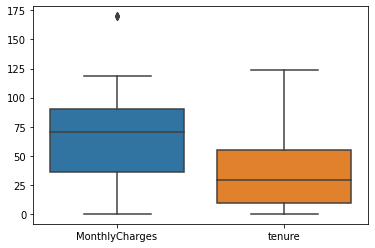

In [9]:
ax = sns.boxplot(data=df_load[["MonthlyCharges","tenure"]])

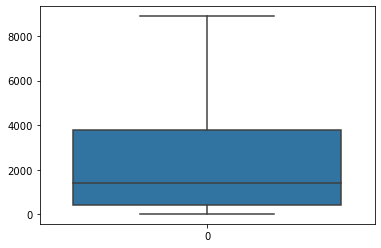

In [10]:
ax = sns.boxplot(data=df_load["TotalCharges"])

#### Total Charges vs Churn

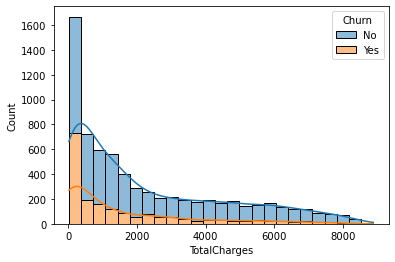

In [11]:
ax = sns.histplot(x="TotalCharges",data=df_load,hue="Churn",kde=True,multiple="stack")

#### Monthly Charges vs Churn

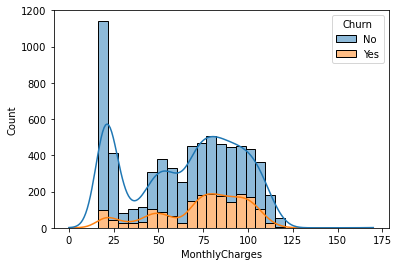

In [12]:
ax = sns.histplot(x="MonthlyCharges",data=df_load,hue="Churn",kde=True,multiple="stack")

#### Tenure vs Churn

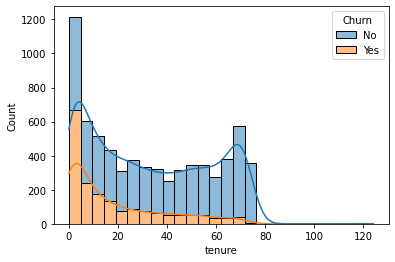

In [13]:
ax = sns.histplot(x="tenure",data=df_load,hue="Churn",kde=True,multiple="stack")

#### Gendervs Churn

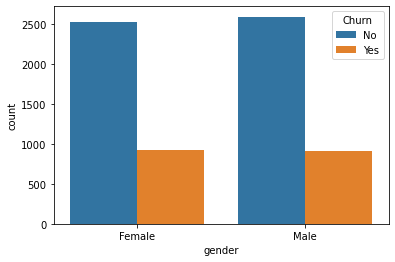

In [14]:
ax = sns.countplot(x="gender",data=df_load,hue="Churn")

#### Senior Citizen vs Churn

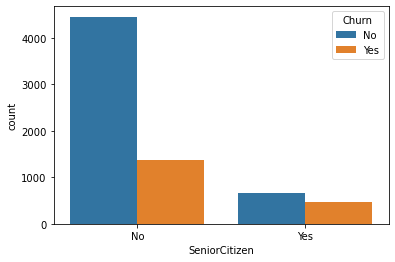

In [15]:
ax = sns.countplot(x="SeniorCitizen",data=df_load,hue="Churn")

#### Partner vs Churn

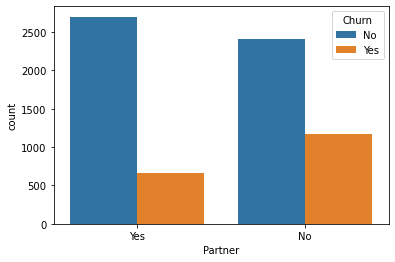

In [16]:
ax = sns.countplot(x="Partner",data=df_load,hue="Churn")

#### Phone Services vs Churn

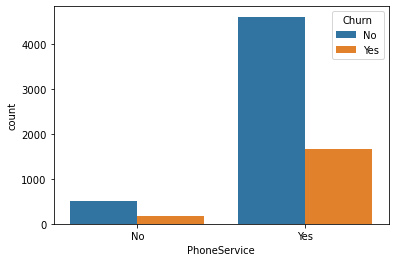

In [17]:
ax = sns.countplot(x="PhoneService",data=df_load,hue="Churn")

#### Internet Service vs Churn

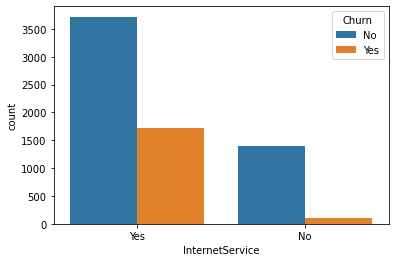

In [18]:
ax = sns.countplot(x="InternetService",data=df_load,hue="Churn")

#### Streaming TV vs Churn

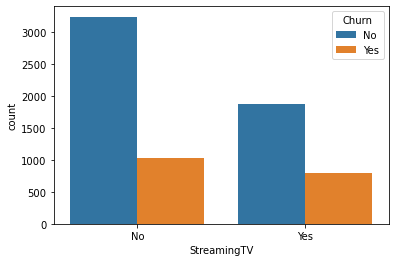

In [19]:
ax = sns.countplot(x="StreamingTV",data=df_load,hue="Churn")

#### Paperless Billing vs Churn

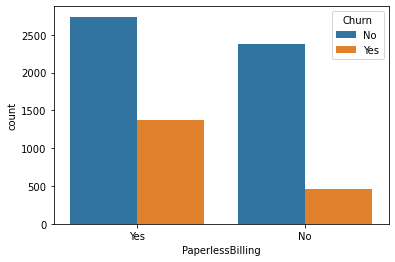

In [20]:
ax = sns.countplot(x="PaperlessBilling",data=df_load,hue="Churn")

#### Final Boss - Churn

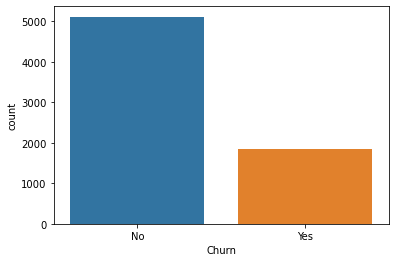

In [21]:
ax = sns.countplot(x="Churn",data=df_load)

In [22]:
df_load.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


### Feature Engineering

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
ss = StandardScaler()

In [24]:
for col in df_load.columns:
    df_load[col] = le.fit_transform(df_load[col])
        
df_load.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,131,71,0
1,1,0,1,60,1,0,0,1,37,2720,0
2,1,0,0,5,1,1,1,0,1343,1659,1
3,0,0,1,72,1,1,1,1,1534,6416,0
4,0,0,1,56,1,1,1,0,911,5137,0


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [26]:
modelling = [('dtc',DecisionTreeClassifier()),
             ('knn',KNeighborsClassifier()),
             ('rfc',RandomForestClassifier()),
             ('SVC',SVC()),
             ('logreg',LogisticRegression())]

In [27]:
churn = df_load["Churn"]

df_load.drop("Churn",1,inplace=True)

In [28]:
df_load = pd.DataFrame(data=ss.fit_transform(df_load.values),
                       index=df_load.index,
                       columns=df_load.columns)
df_load.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges
0,-1.008671,-0.440168,1.033958,-1.279169,-3.064089,-0.79007,0.525738,0.830273,-1.148277,-1.561904
1,0.991404,-0.440168,1.033958,1.123154,0.326361,-0.79007,-1.902088,0.830273,-1.346771,-0.179218
2,0.991404,-0.440168,-0.967158,-1.116299,0.326361,1.26571,0.525738,-1.204423,1.411034,-0.733023
3,-1.008671,-0.440168,1.033958,1.611762,0.326361,1.26571,0.525738,0.830273,1.814358,1.749965
4,-1.008671,-0.440168,1.033958,0.960284,0.326361,1.26571,0.525738,-1.204423,0.498805,1.082372


In [29]:
X_train,X_test,y_train,y_test = train_test_split(df_load,churn,test_size=0.25,random_state=42)

rata_rata = {}
std_dev = {}

for name, model in modelling:
    cv = cross_val_score(model,X_train,y_train,cv=5)
    rata_rata[name] = cv.mean()
    std_dev[name] = cv.std()
    
result = pd.DataFrame(data={'Mean':rata_rata,'Standard Deviasi':std_dev})
result

,Mean,Standard Deviasi
dtc,0.724478,0.014288
knn,0.768421,0.011084
rfc,0.772640,0.004602
SVC,0.792981,0.012586
logreg,0.798160,0.012279
